# Import Packages

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import random

# Matplotlib Configuration

In [47]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

# Loading dataset

In [9]:
iris = load_iris(as_frame=True)
df = pd.DataFrame(iris['data'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Train Test split

In [7]:
def train_test_split(df, train_size, test_size):
    train = df.sample(frac=train_size, random_state=0)
    print("train_size:", train.shape)
    df.drop(train.index, inplace=True)
    test = df
    print("test_size:", test.shape)
    return train, test

In [10]:
train_size, test_size = 0.8, 0.2
train, test = train_test_split(df.copy(), train_size, test_size)

train_size: (120, 5)
test_size: (30, 5)


In [17]:
y_train = train['target'].to_numpy()
X_train = train.drop('target', axis=1).to_numpy()

y_test = test['target'].to_numpy()
X_test = test.drop('target', axis=1).to_numpy()

y_train.shape, X_train.shape, y_test.shape, X_test.shape

((120,), (120, 4), (30,), (30, 4))

# Perceptron

$$E_p(w) = -\Sigma_{n \in M} w^T\phi_nt_n$$

$$w^{(t + 1)} = w^{(t)} - \eta \nabla E_p(w)$$

## Removing `target==2` samples

In [28]:
p_train = train.drop(train[train['target'] == 2].index)
p_test = test.drop(test[test['target'] == 2].index)

p_y_train = p_train['target'].to_numpy()
p_X_train = p_train.drop('target', axis=1).to_numpy()

p_y_test = p_test['target'].to_numpy()
p_X_test = p_test.drop('target', axis=1).to_numpy()

In [37]:
len(p_X_train), len(p_y_train)

(79, 79)

## Convert 0 to -1

In [86]:
for index, i in enumerate(p_y_train):
    if i == 0:
        p_y_train[index] = -1

In [92]:
for index, i in enumerate(p_y_test):
    if i == 0:
        p_y_test[index] = -1

## Number of misclassified

In [87]:
def misclassified_list(w):
    misclassified_arr = list()
    for index, x in enumerate(p_X_train):
        if w.dot(x) * p_y_train[index] <= 0:
            misclassified_arr.append((x, p_y_train[index]))
    
    return misclassified_arr

## Train Perceptron Method

In [90]:
def train_perceptron(learning_rate = 0.001):
    all_misclassified = list()
    w = np.zeros(p_X_test.shape[1])
    misclassified = misclassified_list(w)
    current_misclassified = len(misclassified)
    all_misclassified.append(current_misclassified)
    counter = 0
    
    while len(misclassified) > 0:
        i = random.randint(0, len(misclassified) - 1)
        x, target = misclassified[i]
        w += learning_rate * target * x
            
        misclassified = misclassified_list(w)
        current_misclassified = len(misclassified)
        all_misclassified.append(current_misclassified)
    
    return w, all_misclassified


w_perceptron, all_misclassified = train_perceptron()

In [96]:
w_perceptron

array([ 0.0001, -0.0059,  0.009 ,  0.0044])

In [95]:
all_misclassified[0]

79

In [94]:
all_misclassified[-1]

0

## Plotting the Iterations

In [120]:
def plotting(misclassified, is_train):
    if len(misclassified) is 0:
        return "There isn't any misclassified point"
    if is_train:
        plt.title("Misclassified points number per iteration in train")
    else:
        plt.title("Misclassified points number per iteration in train")
    plt.xlabel("Iteration No")
    plt.ylabel("Misclassified No")
    plt.plot(misclassified)

## Train misclassified No.

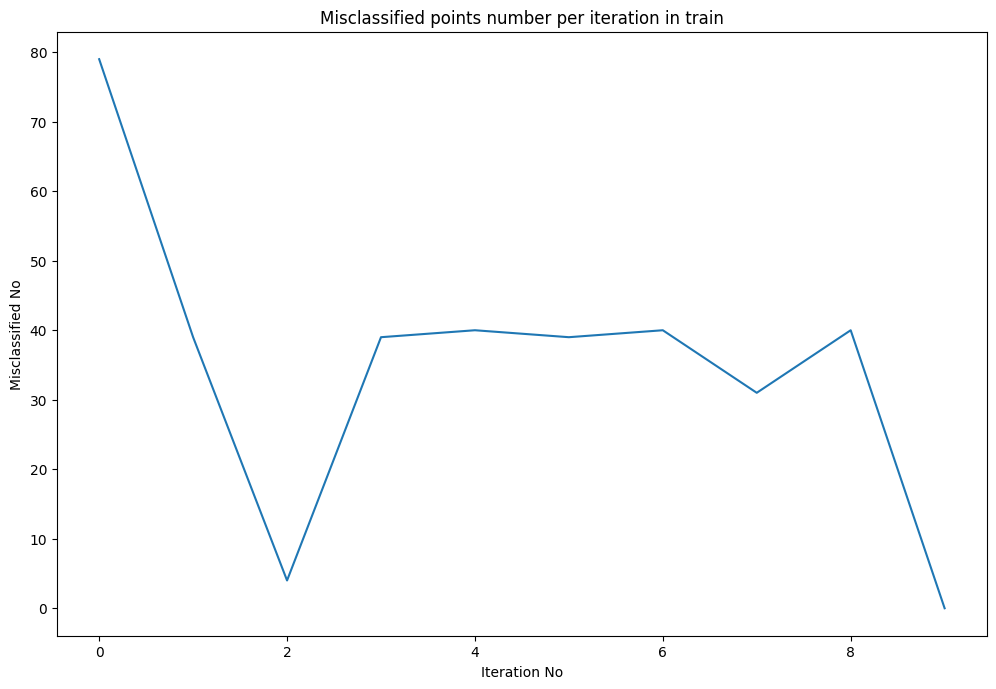

In [121]:
plotting(all_misclassified, True)

## Test Perceptron Method

In [122]:
def test_perceptron(w):
    misclassified_arr, loss = list(), 0
    for index, x in enumerate(p_X_test):
        if w.dot(x) * p_y_test[index] <= 0:
            misclassified_arr.append((x, p_y_test[index]))
            loss += w.dot(x) * p_y_test[index]
    return loss, misclassified_arr

loss, test_misclassified = test_perceptron(w_perceptron)

In [123]:
plotting(test_misclassified, False)

"There isn't any misclassified point"

## Confision Matrix

In [126]:
def confusion_matrix():
    
            
print("confusion Matrix")
print(f"{c1_c1} \t {c1_c2} \n {c2_c1} \t {c2_c2}")

11 	 0 
 0 	 10
